# Numerikus integrálás - A trapézmódszer

### Lengyel Ferenc, Topa Lukács István

A numerikus analízisben a határozott integrál meghatározására használják a trapézmódszert.

$$\int_{a}^{b} f(x) dx$$

Ez a módszer trapézokkal közelíti a függvény alatti terület nagyságát, de úgy is lehet rá tekinteni, mint a jobb- és baloldali Riemann összegek átlagára. Ez alapján a szabály a következőképpen írható fel nyílt alakban:

$$\int_{a}^{b} f(x) dx \approx \frac{\Delta x}{2}(f(x_0)+2f(x_1)+2f(x_2)+2f(x_3)+2f(x_4)+...+2f(x_{n-1})+f(x_n))$$

ahol $\Delta x=\frac{b-a}{n}$ és $x_i=a+i\Delta x$.

Az integrál még jobban közelíthető az integrálandó tartomány felosztásával, majd a résztartományokon alkalmazott trapézmódszerekből származó értékek összegzésével. A gyakorlatban elggyakrabban erre a "láncolt" trapézmódszerre gondolnak, amikor a trapézmódszer segítségével történő integrálásról van szó. Legyen $\{x_k\}$ az $[a,b]$ tartomány egy tetszőleges finomságú felosztása úgy, hogy: $a=x_0<x_1<...<x_{N-1}<x_N=b$ és $\Delta x_k$ a $k$-adik résztartomány hossza ($\Delta x_k=x_k-x_{k-1}$). Ezek alapján:

$$\int_{a}^{b} f(x) dx \approx \sum_{k=1}^{N} \frac{f(x_{k-1})+f(x_k)}{2} \Delta x_k$$

A közelítés pontosabb, ha a felbontás finomsága növekszik (tehát $N$ nő, míg $\Delta x_k$ csökken). Ha a felbontás lépésközei azonosak, a formula leegyszerűsíthető a számítás hatékonysága érdekében.

A trapézmódszer alkalmazásakor természetesen van lehetőségünk a véges integrál ezen módszerrel történő becslésének hibaszámítására is.

## Gyakorlati végrehajtás

#### Nem egységes felosztás

Ha az integrálandó tartomány nem azonos hosszúságú szakaszokra van osztva, akkor csak a definícióra hagyatkozhatunk:

$$ \int_{a}^{b} f(x) dx \approx \sum_{k=1}^{N} \frac{f(x_{k-1})+f(x_k)}{2} \Delta x_k $$

#### Egységes felosztás

Egy olyan tartományom, mely $N$ egyenlő szakaszra van bontva, jelentős egyszerűsítéseket tehetünk. Legyen

$$ \Delta x_k=\Delta x=\frac{b-a}{N} $$

ezáltal a közelítés az alábbiakra módosul

$$ \int_{a}^{b} f(x) dx \approx \frac{\Delta x}{2} \sum_{k=1}^{N} \frac{f(x_{k-1})+f(x_k)}{2}= \frac{\Delta x}{2}\Big(f(x_0)+2\sum_{k=1}^{N-1} f(x_k)+f(x_N)\Big)$$

mely kevesebb kiértékelést igényel, így mi is ezt fogjuk Pythonban leprogramozni.

### A közelítés hibája
A trapézokkal közelítő összegzés hibája az itegrál valós értéke és a numerikus eredmény különbsége:

\begin{equation}
hiba=\int_a^b{f(x)dx}-\frac{b-a}{N}\Bigg[ \frac{f(a)-f(b)}{2}+\sum_{k=1}^{N-1}{f\Bigg(a+k\frac{b-a}{N}\Bigg)}\Bigg]
\end{equation}

Létezik egy $\epsilon$ a és b között, amire
\begin{equation}
hiba=-\frac{(b-a)^3}{12N^2}f''(\epsilon)
\end{equation}

Ha az integrálandó függvény felfele konkáv (tehát a második derivált pozitív), akkor a hiba negatív, és a trapéz-közelítés nagyobb, mint a valós érték. Ezt szemléletesen látszik, ha ábrázoljuk a függyvényt, és berajzoljuk a trapézokat. Hasonlóan ehhez, ha a függvény lefele konkáv, akkor a hiba pozitív, vagyis a trapézmódszer kevesebbet ad. Ha a függvény az integrálás tartományán inflexiós pontot tartalmaz, akkor nehezebb meghatározni a hibát.

Általános esetben három módon lehet meghatározni a hibát:

1. Fourier-sorok
2. Maradék-számítás
3. Euler-Maclaurin összegképlet

Egy aszimptotikus hibaközelítés, ha N$\rightarrow\infty$:

\begin{equation}
hiba=-\frac{(b-a)^3}{12N^2}[f'(b)-f'(a)]+O(N^{-3})
\end{equation}

További közelítéseket a hibában az Euler-Maclaurin összegképlet ad. 

Vitatják, hogy a trapézösszeg konvergenciájának gyorsasága jellemezheti a számított függvény simaságát.


## Példák

Először nézzük a $e^{-x}$ függvényt -$\pi$-től $\pi$-ig.

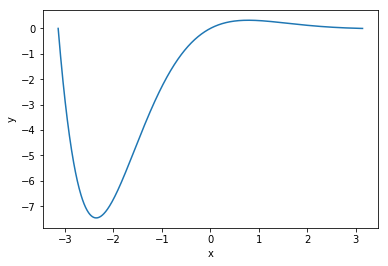

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-(math.pi), math.pi, 1000)
y=(np.exp(-x)*np.sin(x))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Első körben osszuk három részre a tartományt.

In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt

#a határok és a felosztás
a=-(math.pi)
b=math.pi
n=3

#a függvény
def f(hely):
    ertek=math.exp(-hely)*math.sin(hely)
    return ertek

dx=(b-a)/n
#az első és utolsó felvett érték
s=(f(a))+(f(b))

s2=0.0
i=1
#a szumma
while i!=n:
    s2=s2+2*(f(a+i*dx))
    i=i+1
s=s+s2
s=s*(dx/2)
#majd beszorozva az egész (dx/2)-vel

print(s)

-4.532202323871135


Ez nagyon pontatlan. Osszuk 1000 részre és egyből jobb lesz.

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
a=-(math.pi)
b=math.pi
n=1000

def f(hely):
    ertek=math.exp(-hely)*math.sin(hely)
    return ertek

dx=(b-a)/n
s=(f(a))+(f(b))

s2=0.0
i=1
while i!=n:
    s2=s2+2*(f(a+i*dx))
    i=i+1
s=s+s2
s=s*(dx/2)
print(s)


-11.548663369698549


### MATLAB-os megoldás

Képeken

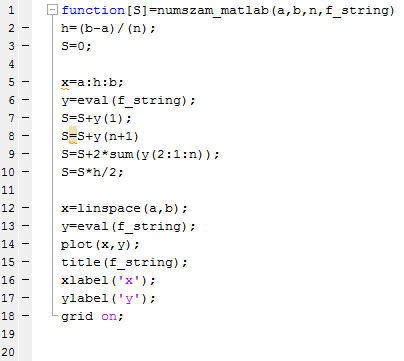

In [9]:
PATH = "C:\\Users\\X\\Desktop\\"
Image(filename = PATH + "matlab_script.PNG", width=400)


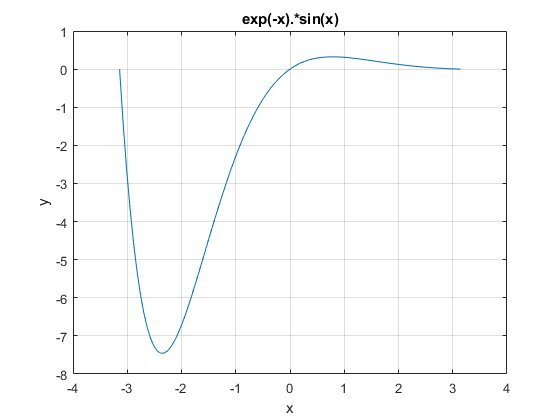

In [33]:
PATH = "C:\\Users\\X\\Desktop\\"
Image(filename = PATH + "exp_kep.png", width=400)

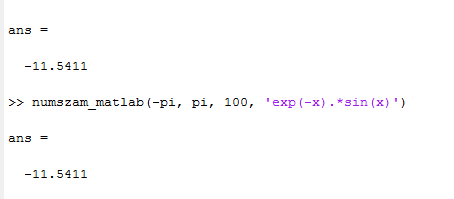

In [35]:
PATH = "C:\\Users\\X\\Desktop\\"
Image(filename = PATH + "exp_konzol.PNG", width=500)